# Numerical Verification of Wave Propagation

This notebook performs numerical verification of wave propagation in a layered medium using random layer parameters. The Transfer Matrix Method (TMM) is compared with a path-based approach.

J. Garcia-Suarez 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
NN = 12  # Number of layers
c0 = 3e8  # Speed of light (m/s)


In [2]:
# Random layer parameters
ns = np.random.uniform(1, 10, NN)  # Refractive indices
ls_vals = np.random.randint(1, 11, NN) * 1e-8  # Thicknesses in meters
freqList = np.arange(0.1, 10.05, 0.05) * 1e14  # Frequency range in Hz


In [3]:
# TE layer propagation matrix function
def P(n, d, omega):
    k = omega * n / c0
    return np.array([[np.cos(k * d), np.sin(k * d) / k],
                     [-k * np.sin(k * d), np.cos(k * d)]])


In [4]:
# Transfer Matrix Method (TMM)
tmmResults = []
for f in freqList:
    omega = 2 * np.pi * f
    auxResult = P(ns[0], ls_vals[0], omega)
    for i in range(1, NN):
        auxResult = np.dot(P(ns[i], ls_vals[i], omega), auxResult)
    tmmResults.append((f, auxResult[0, 0].real))


In [5]:
# Path decomposition evaluation
paths = [p for p in np.array(np.meshgrid(*[[-1, 1]] * NN)).T.reshape(-1, NN) if p[0] == 1]

numPathTotal = []
for f in freqList:
    omega = 2 * np.pi * f
    k_vals = omega * ns / c0
    total = 0
    for p in paths:
        amp = 1
        for i in range(1, NN):
            amp *= 0.5 * (1 + p[i-1]*p[i]*k_vals[i-1]/k_vals[i])
        phase = sum([p[i]*k_vals[i]*ls_vals[i] for i in range(NN)])
        total += amp * np.cos(phase)
    numPathTotal.append((f, total))


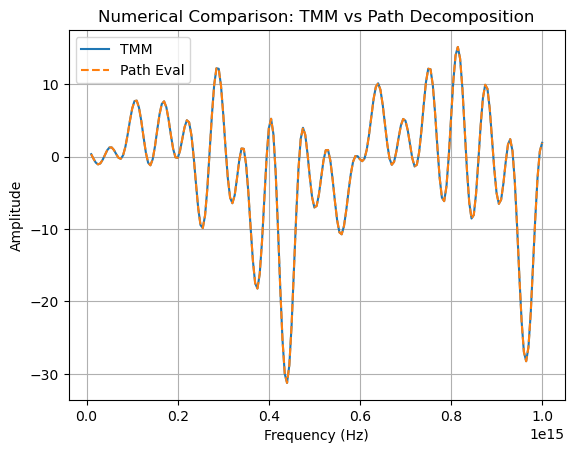

In [6]:
# Plotting the results
plt.figure()
plt.plot(*zip(*tmmResults), label='TMM')
plt.plot(*zip(*numPathTotal), label='Path Eval', linestyle='--')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Numerical Comparison: TMM vs Path Decomposition')
plt.grid(True)
plt.show()
